## FOOTBALL DATA ANALYSIS
*************************************************

### **INTRODUCTION**
********************************************************

#### **GOAL**
The goal is to gain a comprehensive understanding of the potential profitability of soccer betting as a business opportunity through a thorough analysis of provided data. Additionally, the goal is to utilize statistical modeling techniques to accurately predict the outcome of soccer matches. By doing so, we aim to provide valuable insights into the world of soccer betting and its potential as a lucrative business venture.

#### **Objectives**

* Which leagues are in which countries?
* Which leagues score the most/fewest goals?
* Who are the top scorers in each team and league?
* Is there such a thing as home advantage?
* Can we predict how many goals each team will score in each match?
* Can we predict which team will win the match?

#### **DATA USED**
The data is extracted from the kaggle.com  [Ultimate 25k+ Matches Football Database -European](https://www.kaggle.com/datasets/prajitdatta/ultimate-25k-matches-football-database-european?resource=download)

------------------------
### IMPORTING PACKAGES AND DATA LOADING
-------------------------------------

In [313]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import sqlite3

# For visualisations
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib as mpl

# For statistical analysis
import statsmodels.api as sm
from scipy.stats import chisquare
from sklearn.multioutput import MultiOutputClassifier

# For display of multiple variables
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# For working with XML data
import xml.etree.ElementTree as ET

import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegressionCV,
    LogisticRegression,
    ElasticNetCV,
)
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report


In [314]:
# Customizing Plots with Color, Font, and Transparency
color = "#00BFFF"
font = "Times New Roman"
alpha = 0.5

### Read data from SQL database


In [227]:
from google.colab import drive
drive.mount("/content/drive")

con = sql.connect("/content/drive/MyDrive/database.sqlite")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [228]:
country_df = pd.read_sql_query("SELECT * FROM Country", con)
print('list of countries')
country_df.head(5)


list of countries


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [229]:
league_df = pd.read_sql_query("SELECT * FROM League", con)

print("League Table:")
league_df.head()


League Table:


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [230]:
match_df = pd.read_sql_query("SELECT * FROM Match", con)
print("Table of matches:")
match_df.head()

Table of matches:


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [231]:
player_df = pd.read_sql_query("SELECT * FROM Player", con)
print("Table of players:")
player_df.head()

Table of players:


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [232]:
attributes_df= pd.read_sql_query("SELECT * FROM Player_Attributes", con)
print("Table of attributes:")
attributes_df.head()


Table of attributes:


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [233]:
team_df = pd.read_sql_query("SELECT * FROM Team", con)
print("Table of teams:")
team_df.head()


Table of teams:


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [234]:
team_attributes_df = pd.read_sql_query("SELECT * FROM Team_Attributes", con)
print("Table of teams' attributes:")
team_attributes_df.head()

Table of teams' attributes:


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [235]:
team_attributes_df

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,Organised,52,Normal,48,Normal,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


***********************************
### DATA EXPLORATION 
***************************************

#### Q1. Which leagues are in which countries?

Trying to see the info of both tables league and countries

In [236]:
print("List of coutries:")
country_df.info()
print("\n list of leagues:")
league_df.info()

List of coutries:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes

 list of leagues:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [237]:
query = """
    SELECT
        c.id AS country_id,
        c.name AS country_name,
        l.id AS league_id,
        l.name AS league_name
    FROM
        Country c
        LEFT JOIN League l ON c.id = l.country_id
"""

country_leagues_df = pd.read_sql_query(query, con)
country_leagues_df[["country_name", "league_name"]]

,country_name,league_name
0,Belgium,Belgium Jupiler League
1,England,England Premier League
2,France,France Ligue 1
3,Germany,Germany 1. Bundesliga
4,Italy,Italy Serie A
5,Netherlands,Netherlands Eredivisie
6,Poland,Poland Ekstraklasa
7,Portugal,Portugal Liga ZON Sagres
8,Scotland,Scotland Premier League
9,Spain,Spain LIGA BBVA


The report lists 10 countries and their corresponding leagues, including Belgium Jupiler League, England Premier League, France Ligue 1, Germany 1. Bundesliga, Italy Serie A, Netherlands Eredivisie, Poland Ekstraklasa, Portugal Liga ZON Sagres, Scotland Premier League, and Switzerland Super League.

#### Q2. Which leagues score the most/fewest goals?

Missing data inspection for *Match* table:

In [238]:
missing_values = match_df.isnull().sum()
print(match_df.loc[:, missing_values > 0])


       home_player_X1  home_player_X2  home_player_X3  home_player_X4  \
0                 NaN             NaN             NaN             NaN   
1                 NaN             NaN             NaN             NaN   
2                 NaN             NaN             NaN             NaN   
3                 NaN             NaN             NaN             NaN   
4                 NaN             NaN             NaN             NaN   
...               ...             ...             ...             ...   
25974             1.0             2.0             4.0             6.0   
25975             1.0             3.0             5.0             7.0   
25976             1.0             2.0             4.0             6.0   
25977             1.0             2.0             4.0             6.0   
25978             1.0             2.0             4.0             6.0   

       home_player_X5  home_player_X6  home_player_X7  home_player_X8  \
0                 NaN             NaN             

The given dataset has some missing values, so we will focus only on the columns 'home_team_goal', 'away_team_goal', and 'season' to answer this question. To check for missing values in these columns, we can use the following code:

In [239]:
print(match_df[['home_team_goal', 'away_team_goal', 'season']].isnull().sum())

home_team_goal    0
away_team_goal    0
season            0
dtype: int64


In [240]:
query = """
SELECT l.name AS league_name, SUM(m.home_team_goal + m.away_team_goal) AS total_goals
FROM Match m
JOIN League l ON m.league_id = l.id
GROUP BY l.name
ORDER BY total_goals DESC
"""
goals_df = pd.read_sql_query(query, con)
goals_df 


,league_name,total_goals
0,Spain LIGA BBVA,8412
1,England Premier League,8240
2,Italy Serie A,7895
3,Netherlands Eredivisie,7542
4,France Ligue 1,7427
5,Germany 1. Bundesliga,7103
6,Portugal Liga ZON Sagres,5201
7,Belgium Jupiler League,4841
8,Scotland Premier League,4804
9,Poland Ekstraklasa,4656


The data is taken from years 2008 to 2016, The top 6 leagues with the highest total number of goals are Spain's LIGA BBVA with 8,412 goals, England's Premier League with 8,240 goals, Italy's Serie A with 7,895 goals, Netherlands' Eredivisie with 7,542 goals, France's Ligue 1 with 7,427 goals, and Germany's 1. Bundesliga with 7,103 goals.
The total number of goals scored in each league is an important measure of the overall competitiveness and excitement of the league. It can also be used as a measure of the level of skill and performance of the players in each league. This data can be useful for various stakeholders, including football fans, coaches, and team managers, in making decisions related to their respective teams.
<br>Let's see how number of goals changed through seasons:

In [241]:
query="""
    SELECT  l.name, m.season, SUM(m.home_team_goal + m.away_team_goal) AS total_goals
    FROM League AS l 
    JOIN Match AS m ON l.id = m.league_id
    GROUP BY league_id, season;
    """
seasonal_goals = pd.read_sql_query(query, con)
seasonal_goals

seasonal_goals.groupby("name").agg(avg_goals=("total_goals", "mean")).sort_values(
    by="avg_goals", ascending=False
)

,name,season,total_goals
0,Belgium Jupiler League,2008/2009,855
1,Belgium Jupiler League,2009/2010,565
2,Belgium Jupiler League,2010/2011,635
3,Belgium Jupiler League,2011/2012,691
4,Belgium Jupiler League,2012/2013,703
...,...,...,...
83,Switzerland Super League,2011/2012,425
84,Switzerland Super League,2012/2013,462
85,Switzerland Super League,2013/2014,520
86,Switzerland Super League,2014/2015,517


,avg_goals
name,
Spain LIGA BBVA,1051.500
England Premier League,1030.000
Italy Serie A,986.875
Netherlands Eredivisie,942.750
France Ligue 1,928.375
Germany 1. Bundesliga,887.875
Portugal Liga ZON Sagres,650.125
Belgium Jupiler League,605.125
Scotland Premier League,600.500


In [242]:
seasonal_goals.season

0     2008/2009
1     2009/2010
2     2010/2011
3     2011/2012
4     2012/2013
        ...    
83    2011/2012
84    2012/2013
85    2013/2014
86    2014/2015
87    2015/2016
Name: season, Length: 88, dtype: object

The average number of goals follows the same trend as the total number of goals.

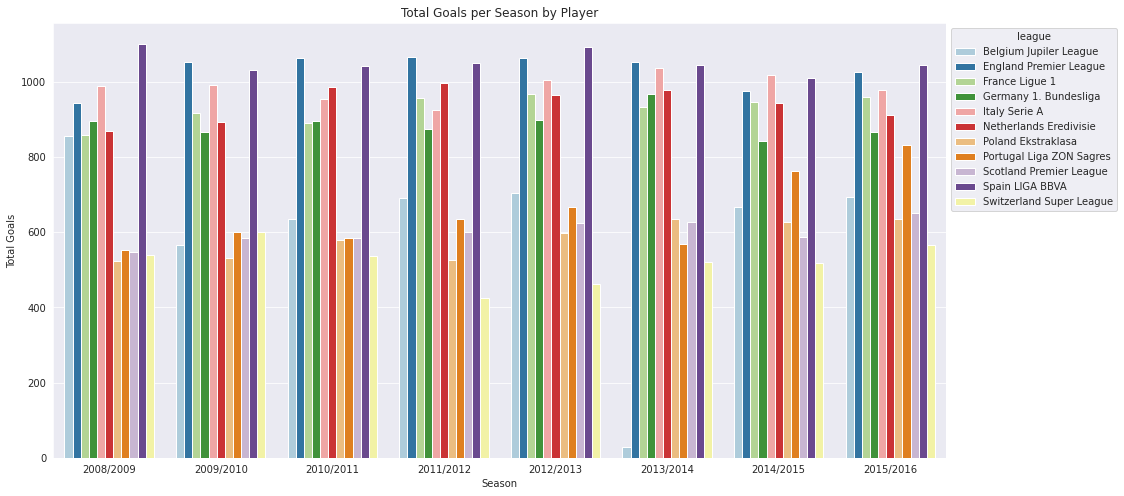

In [243]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(
    y=seasonal_goals["total_goals"],
    x=seasonal_goals["season"],
    hue=seasonal_goals["name"],
    palette="Paired",
)
ax.set_xlabel("Season")
ax.set_ylabel("Total Goals")
ax.set_title("Total Goals per Season by Player")
ax.legend(title="league", loc="upper left", bbox_to_anchor=(1, 1))
plt.show();




The number of goals scored per season has been relatively stable over time for most football leagues, except for the Belgian Jupiter League in the 2013/2014 season which had an unusually low number of goals. The English Premier League and Spanish La Liga have had the highest average number of goals per season, while the German Bundesliga and Italian Serie A have had lower averages. While the number of goals scored per season is a useful metric for comparing offensive performance, it should be used with caution as other factors can also affect goal scoring.

In [244]:
# merge the match_df DataFrame with the leagues_df DataFrame
merged_df = pd.merge(match_df, league_df, on="id")

# filter the resulting DataFrame to find matches in league 1
league1_df = merged_df[merged_df["league_id"] == 1]

# get the name of league 1
league1_name = league1_df["name"].iloc[0]
league1_name


'Belgium Jupiler League'

In [245]:
len(
    match_df[((match_df["league_id"] == 1) & (match_df["season"] == "2013/2014"))]
)

12

The output is 12, which means that there were 12 matches played in the Belgian Jupiler League during the season 2013/2014.

#### Understanding player performance:

In [246]:
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [247]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


<Axes: >

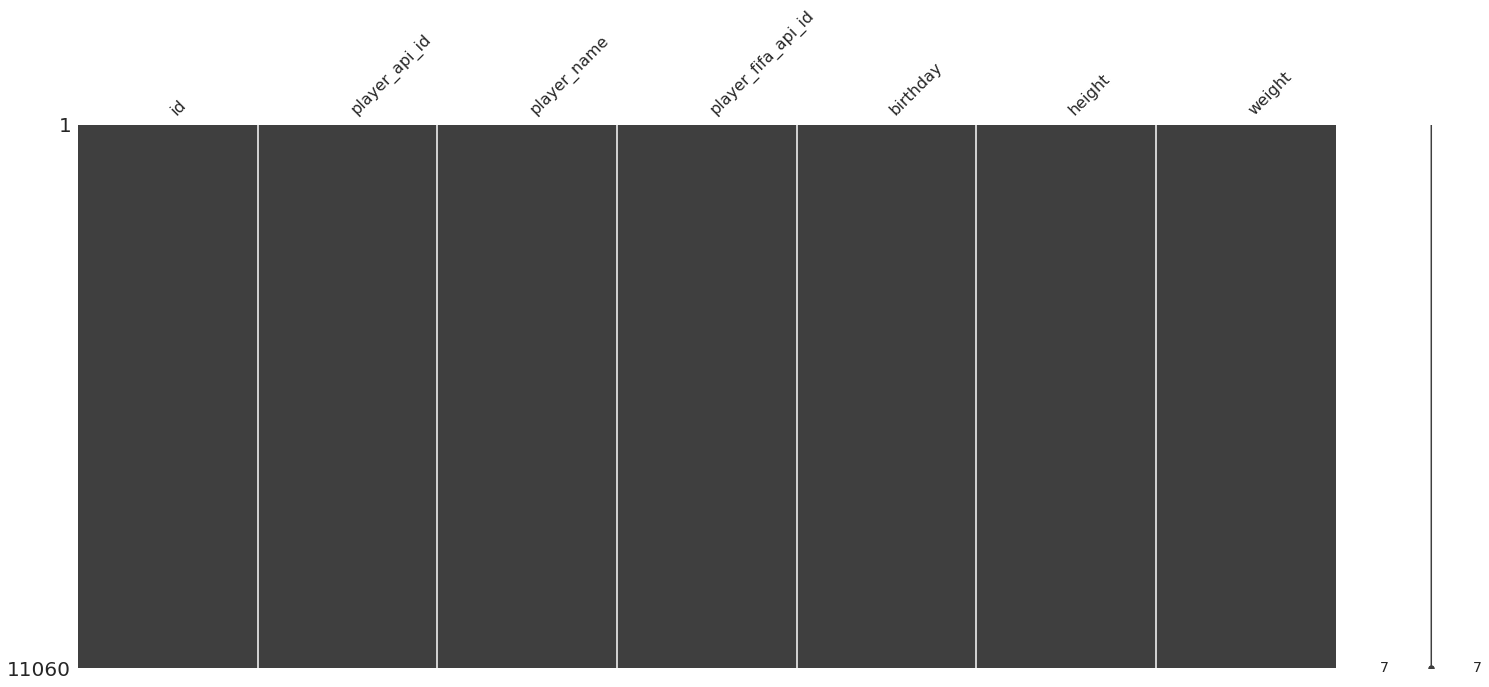

In [248]:
msno.matrix(player_df)

In [249]:
# checking for duplicated values
duplicates = player_df.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicates in player_df:", num_duplicates)

Number of duplicates in player_df: 0


There is no missing data or duplicates in this table.

Analysis of player age, which can be an important factor in evaluating player performance and potential.



In [250]:
# extract the year from the "birthday" column
player_df["year_born"] = pd.DatetimeIndex(player_df["birthday"]).year

In [251]:
# calculate the age of each player
player_df["age"] = 2023 - player_df["year_born"]

In [252]:
print(player_df["age"].value_counts().sum())

11060


In [253]:
pd.DataFrame(player_df["age"].describe())

,age
count,11060.000000
mean,36.357143
std,5.481362
min,24.000000
25%,32.000000
50%,36.000000
75%,40.000000
max,56.000000


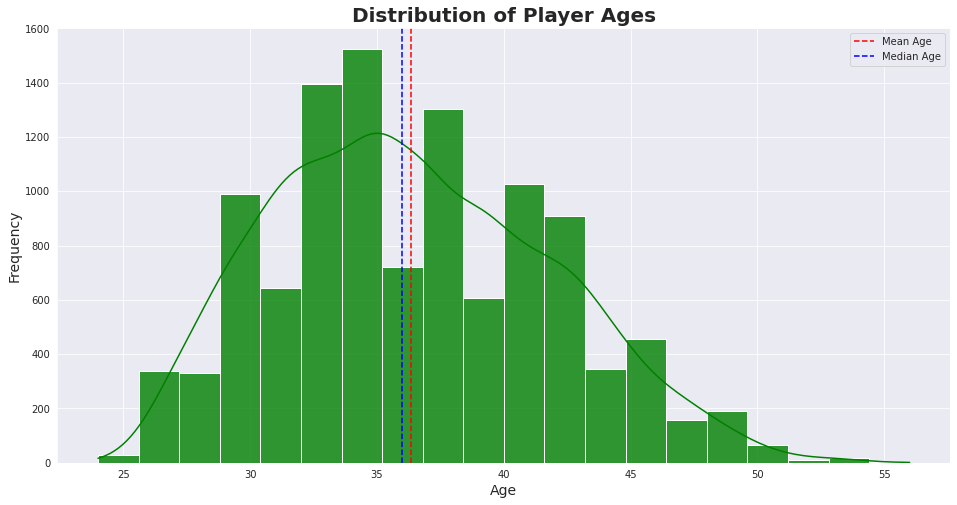

In [254]:
# create a histogram of player ages
fig, ax = plt.subplots(figsize=(16, 8))
sns.histplot(player_df["age"], kde=True, color="green", alpha=0.8, bins=20)
plt.title("Distribution of Player Ages", size=20, weight="bold")
plt.xlabel("Age", size=14)
plt.ylabel("Frequency", size=14)
plt.axvline(x=player_df["age"].mean(), color="red", linestyle="--", label="Mean Age")
plt.axvline(x=player_df["age"].median(), color="blue", linestyle="--", label="Median Age")
plt.legend()
plt.show();

The histogram shows the distribution of ages for players in the dataset. The majority of players fall between the ages of 30 and 40, with the mean age being 36.36 years and the median age being 36 years. The age distribution is roughly symmetric, with a slight right skew, indicating that there are slightly more players in their late 30s than in their early 20s.

There are also a few players who are outliers and older than the rest of the population, with the oldest player being 56 years old. Overall, the age range of players in the dataset is from 24 to 56 years old, with an average age of around 36 years. The graph highlights that the age distribution of players is an important factor to consider when analyzing and making decisions in football-related activities such as recruitment and team composition.

In order to take analysis further physical body parameters will be oberved:

In [255]:
player_df

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,year_born,age
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992,31
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,1989,34
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,1991,32
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,1982,41
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,1979,44
...,...,...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168,1979,44
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176,1986,37
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154,1979,44
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172,1981,42


In [256]:
# converting weight from lb to kg
player_df["weight_kg"] = round(player_df["weight"] * 0.453592, 2)

player_df

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,year_born,age,weight_kg
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992,31,84.82
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,1989,34,66.22
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,1991,32,73.94
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,1982,41,89.81
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,1979,44,69.85
...,...,...,...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168,1979,44,76.20
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176,1986,37,79.83
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154,1979,44,69.85
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172,1981,42,78.02


In [257]:
player_df[["height", "weight"]].describe()

,height,weight
count,11060.000000,11060.000000
mean,181.867445,168.380289
std,6.369201,14.990217
min,157.480000,117.000000
25%,177.800000,159.000000
50%,182.880000,168.000000
75%,185.420000,179.000000
max,208.280000,243.000000


The count for both variables is 11060, which indicates that there are no missing values.

The mean height is approximately 181.87 cm, while the mean weight is approximately 76.38 kg.

The standard deviation (std) for height is approximately 6.37 cm, while the std for weight is approximately 6.80 kg. This indicates that there is relatively more variability in weight than in height.

The minimum height is approximately 157.48 cm, and the minimum weight is approximately 53.07 kg. The maximum height is approximately 208.28 cm, and the maximum weight is approximately 110.22 kg. This indicates that there is a wide range of values for both variables.

The 25th percentile (Q1) for height is approximately 177.80 cm, and the 25th percentile for weight is approximately 72.12 kg. This means that 25% of the observations for each variable are below these values.

The median height (Q2) is approximately 182.88 cm, and the median weight is approximately 76.20 kg. This means that 50% of the observations for each variable are below these values.

The 75th percentile (Q3) for height is approximately 185.42 cm, and the 75th percentile for weight is approximately 81.19 kg. This means that 75% of the observations for each variable are below these values.

Overall, this summary provides a quick overview of the distribution of height and weight in the "player_df" DataFrame.








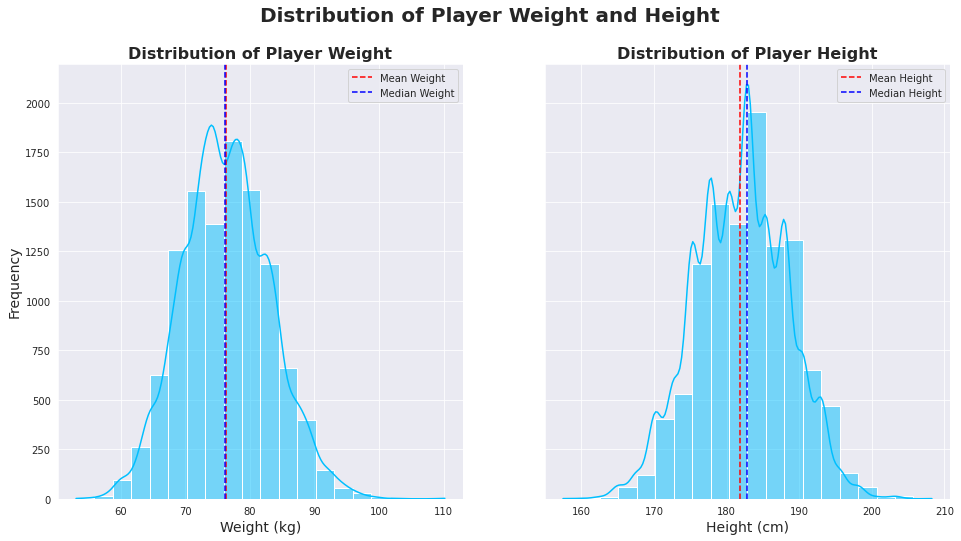

In [258]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Plot weight histogram with kde
sns.histplot(player_df['weight_kg'], color=color, bins=20, ax=ax1, kde=True)
ax1.set_xlabel('Weight (kg)', size=14)
ax1.set_ylabel('Frequency', size=14)
ax1.set_title('Distribution of Player Weight', weight='bold', size=16)

# Add mean and median weight lines
ax1.axvline(x=player_df['weight_kg'].mean(), color='red', linestyle='--', label='Mean Weight')
ax1.axvline(x=player_df['weight_kg'].median(), color='blue', linestyle='--', label='Median Weight')
ax1.legend()

# Plot height histogram with kde
sns.histplot(player_df['height'], color=color, bins=20, ax=ax2, kde=True)
ax2.set_xlabel('Height (cm)', size=14)
ax2.set_ylabel('Frequency', size=14)
ax2.set_title('Distribution of Player Height', weight='bold', size=16)

# Add mean and median height lines
ax2.axvline(x=player_df['height'].mean(), color='red', linestyle='--', label='Mean Height')
ax2.axvline(x=player_df['height'].median(), color='blue', linestyle='--', label='Median Height')
ax2.legend()

# Add overall title
fig.suptitle('Distribution of Player Weight and Height', weight='bold', size=20)

# Show the plot
plt.show();

On average, soccer players have a height of approximately 182 cm with a range of 50 cm from the shortest to tallest player. However, the majority of players fall within the range of 177 to 185 cm. 

In terms of weight, the average soccer player weighs around 76.4 kg, with a range of 53 to 110 kg. Most players fall within the range of 72 to 81 kg. The histograms show a positive relationship between weight and height parameters.

These physical parameters of soccer players vary widely, and may be important for different positions on the field. However, this dataset does not provide information on player positions.

Both histograms have a similar spread of data, with the majority of players falling within the middle range of weights and heights.

The kde plots overlaid on the histograms give a smooth estimate of the probability density function of weight and height distribution of the players.

Overall, the histograms show the distribution of player weight and height, which can provide insights into the physical characteristics of football players. The graphs suggest that football players tend to have a relatively narrow range of weight and height, but with some variation among individuals.








To gain a better understanding of the physical characteristics of soccer players, lets calculate their Body Mass Index (BMI). 

In [259]:
player_df['height_m'] = player_df['height'] / 100
player_df['bmi'] = player_df['weight'] / (player_df['height_m'] ** 2)


In [260]:
pd.DataFrame(player_df["bmi"].describe())

,bmi
count,11060.000000
mean,50.851281
std,2.903717
min,38.778383
25%,48.886925
50%,50.829577
75%,52.627700
max,68.047281


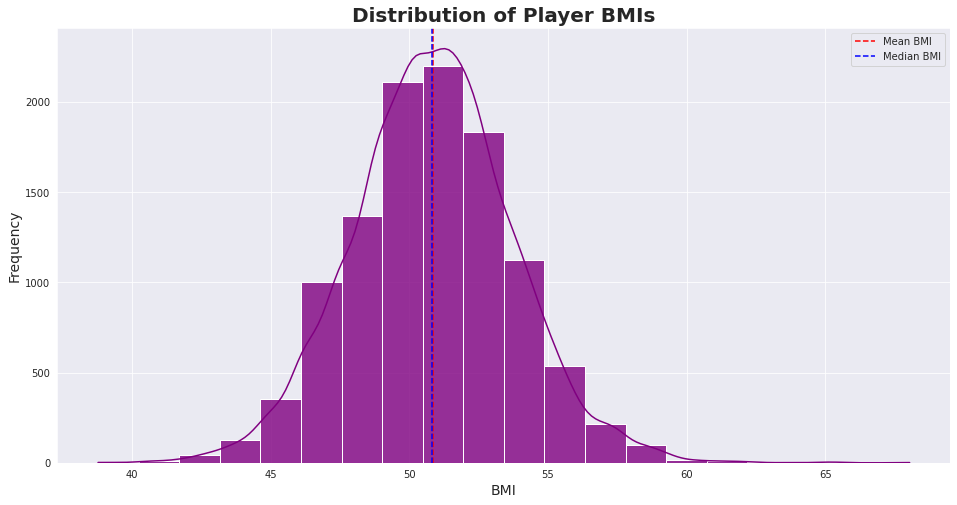

In [261]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.histplot(player_df["bmi"], kde=True, color="purple", alpha=0.8, bins=20)
plt.title("Distribution of Player BMIs", size=20, weight="bold")
plt.xlabel("BMI", size=14)
plt.ylabel("Frequency", size=14)
plt.axvline(x=player_df["bmi"].mean(), color="red", linestyle="--", label="Mean BMI")
plt.axvline(x=player_df["bmi"].median(), color="blue", linestyle="--", label="Median BMI")
plt.legend()
plt.show();


For adults who are 20 years old or older, having a body mass index (BMI) between 18.5 and 24.9 is generally considered to be a healthy weight. If someone has a lower BMI, it means they may be underweight, and if they have a higher BMI, it means they may be obese. However, the accuracy and interpretation of BMI have been debated, particularly in the context of athletes. Nevertheless, when looking at the BMI of most athletes, it can be observed that they typically fall within the range of a healthy person with few exceptions.

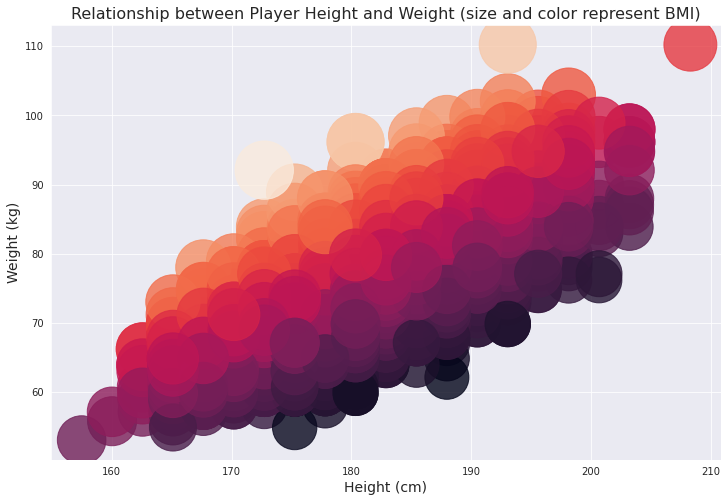

In [262]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(
    x=player_df["height"],
    y=player_df["weight_kg"],
    s=player_df["bmi"]*50, # Set marker size based on BMI
    c=player_df["bmi"], # Set marker color based on BMI
    alpha=0.8
)


ax.set_xlabel("Height (cm)", fontsize=14)
ax.set_ylabel("Weight (kg)", fontsize=14)
ax.set_title("Relationship between Player Height and Weight (size and color represent BMI)", fontsize=16)

plt.show();


The graph shows the relationship between the height and weight of players.

The x-axis represents the height of the players in centimeters, while the y-axis represents the weight of the players in kilograms.

The points on the graph represent individual players, with their height and weight plotted.

We can see that there is a general trend of increasing weight with increasing height.

The colors of the points represent the BMI of the players, with darker colors indicating higher BMI.

We can see that there is a clustering of darker colored points in the upper right corner of the graph, indicating that taller players with higher weight tend to have higher BMI values.

Overall, the graph suggests a positive correlation between height and weight, and between height/weight and BMI.




Lets see the overall ratinf and gthe skill dribbling

In [263]:
# Merge datasets on player ID
merged_df = pd.merge(player_df, attributes_df, on='player_api_id', how='inner')

In [264]:
merged_df

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,year_born,age,weight_kg,height_m,bmi,id_y,player_fifa_api_id_y,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992,31,84.82,1.8288,55.912535,1,218353,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992,31,84.82,1.8288,55.912535,2,218353,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992,31,84.82,1.8288,55.912535,3,218353,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992,31,84.82,1.8288,55.912535,4,218353,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992,31,84.82,1.8288,55.912535,5,218353,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,1982,41,79.83,1.8034,54.116355,183974,102359,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,1982,41,79.83,1.8034,54.116355,183975,102359,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,1982,41,79.83,1.8034,54.116355,183976,102359,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,1982,41,79.83,1.8034,54.116355,183977,102359,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


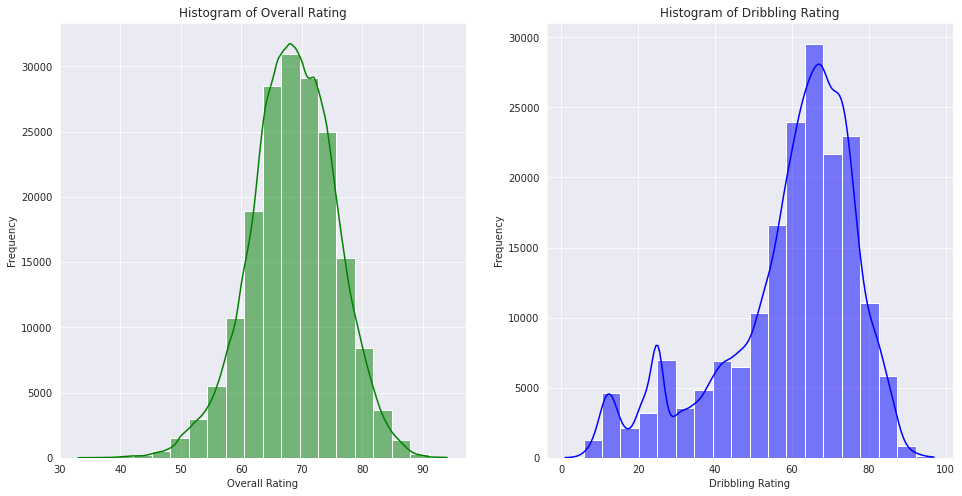

In [265]:
# Visualize overall rating and player rating using histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

sns.histplot(merged_df['overall_rating'], color='green', bins=20, kde=True, ax=ax1)
ax1.set_xlabel('Overall Rating')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Overall Rating')

sns.histplot(merged_df['dribbling'], color='blue', bins=20, kde=True, ax=ax2)
ax2.set_xlabel('Dribbling Rating')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Dribbling Rating')

plt.show();

The graph shows the distribution of overall ratings and dribbling ratings for players in the dataset. The histogram on the left shows the distribution of overall ratings, which range from 40 to 90, with a mean around 67.5.

 The distribution is roughly bell-shaped with a slight skew to the right. 
 
 The histogram on the right shows the distribution of dribbling ratings, which range from 0 to 95, with a mean around 59.5. The distribution is also roughly bell-shaped, but with a wider spread and a more pronounced skew to the right.
 
  Comparing the two histograms, it seems that overall ratings tend to be higher than dribbling ratings, with a larger proportion of players having higher overall ratings than higher dribbling ratings.
  
   However, there is some overlap in the middle of the distributions, where players may have similar overall and dribbling ratings.

Now let's find the overall rating and the players potential rating

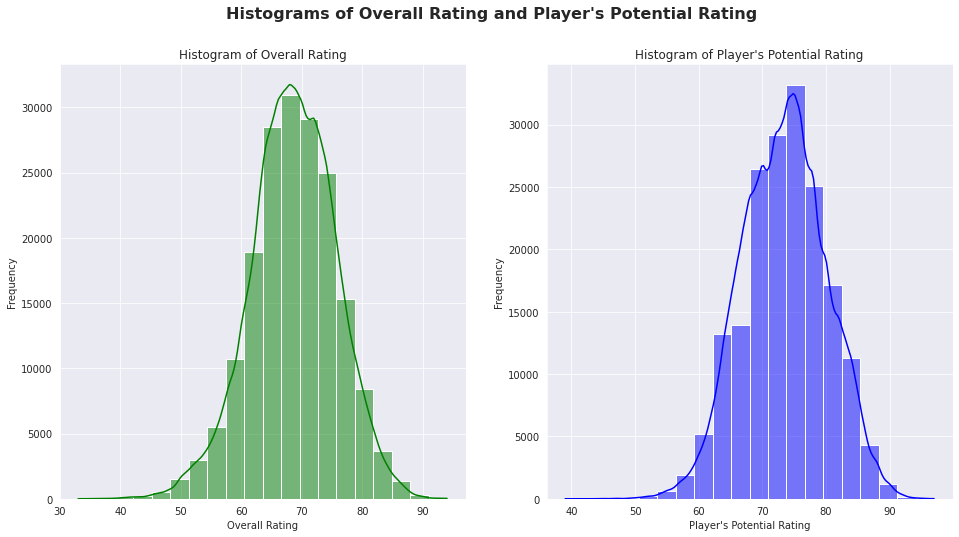

In [266]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot overall rating histogram with kde
sns.histplot(merged_df['overall_rating'], color='green', bins=20, kde=True, ax=ax1)
ax1.set_xlabel('Overall Rating')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Overall Rating')

# Plot player's potential rating histogram with kde
sns.histplot(merged_df['potential'], color='blue', bins=20, kde=True, ax=ax2)
ax2.set_xlabel("Player's Potential Rating")
ax2.set_ylabel('Frequency')
ax2.set_title("Histogram of Player's Potential Rating")

fig.suptitle('Histograms of Overall Rating and Player\'s Potential Rating', fontsize=16, weight='bold')
plt.show();

The above graph shows the distribution of overall rating and player's potential rating in two separate histograms. The left histogram shows the distribution of overall rating and the right histogram shows the distribution of player's potential rating. Both histograms have the same number of bins (20) and are plotted with a kernel density estimate (KDE) to provide a smoother representation of the data distribution.

The overall rating histogram has a peak around 70 and a tail that extends to 95. This suggests that the majority of players have an overall rating between 70 and 80, while there are some exceptional players with a rating above 90.

The player's potential rating histogram has a peak around 75 and a tail that extends to 95. This suggests that the majority of players have a potential rating between 70 and 80, while there are some exceptional players with a potential rating above 90.

Comparing the two histograms, it seems that the distribution of player's potential rating is slightly shifted to the right (higher ratings) compared to the distribution of overall rating, indicating that some players may have a higher potential than their current overall rating suggests.







Trying to see any corelation in attributes dataset

In [267]:
attributes_df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [268]:
# numerical columns to include in the correlation matrix
num_cols = ['overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 
            'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 
            'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 
            'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 
            'penalties', 'marking', 'standing_tackle', 'sliding_tackle']


In [269]:
# Calculate the correlation matrix
corr = attributes_df[num_cols].corr()


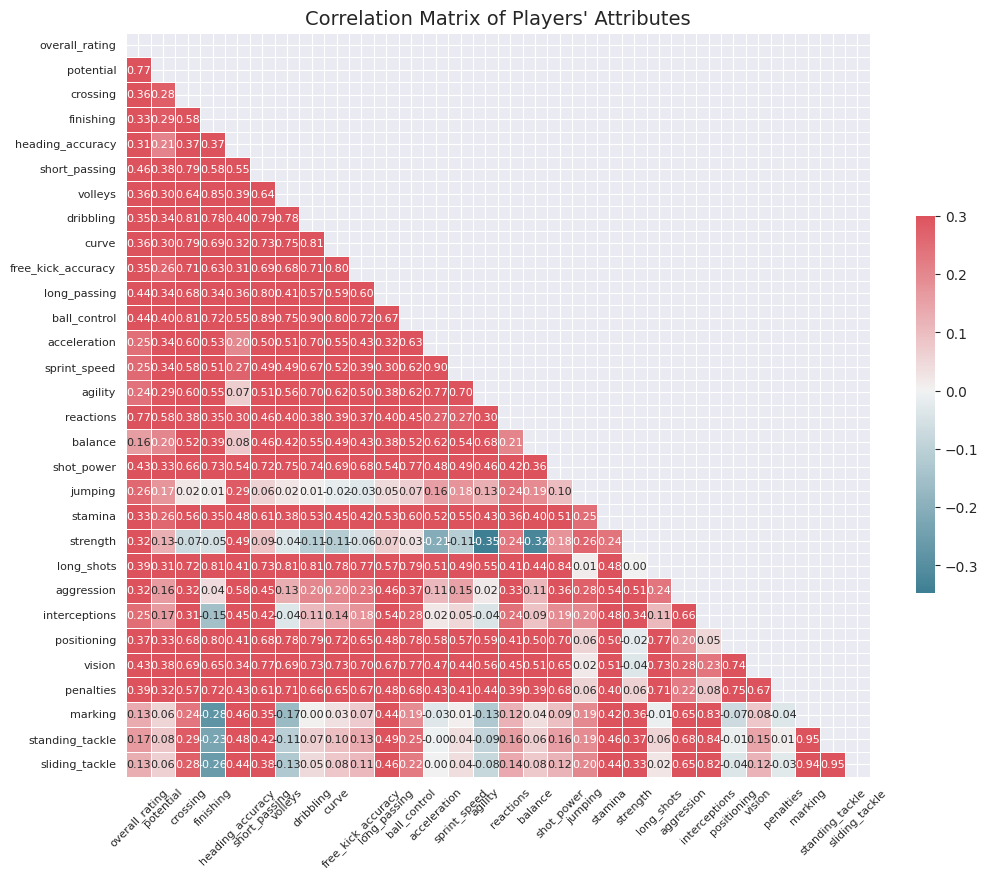

In [270]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=100)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f",
            annot_kws={"size": 8}, xticklabels=1, yticklabels=1, ax=ax)

ax.set_title("Correlation Matrix of Players' Attributes", fontsize=14)

plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.show();


 we can observe that there is a strong positive correlation between "overall_rating" and "potential", which means that players who have a high rating in one attribute tend to have a high rating in the other as well. 

We can also see that there is a negative correlation between "aggression" and "balance", suggesting that players who are more aggressive tend to have lower balance ratings. Additionally, we can see that there are several features with weak or no correlation with other attributes, such as "marking" or "sliding_tackle".

 Overall, the correlation matrix heatmap provides insights into the relationships between different attributes of the players in the dataset.

#### Q3. Who are the top scorers in each team and league?

In [271]:
print(match_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
None


In [272]:
match_df = pd.read_sql_query("SELECT * FROM Match", con)
match_df 

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [273]:
# checking for duplicated rows
match_df.duplicated().any().sum()

0

In [274]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)
print(list(match_df.columns))



['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1', 'home_player_2', 'home_player_

In [275]:
goal_values = match_df['goal'].values
print(goal_values)

[None None None ... None None None]


In [276]:
# Check for null values in the "goal" column
print(match_df['goal'].isnull().sum())


11762


The Goal column is XML format and it cotains team,persona and type of goal.

In [277]:
# finding the proportion of missing values in Goal
goal_missing =match_df["goal"].isnull().mean()

print("Proportion of missing data in 'goal' column: ", round(goal_missing, 2))


Proportion of missing data in 'goal' column:  0.45


Let's identify the leagues table with the most missing data in the "goal" column to gain insights for further data interpretation.

In [278]:
# Compute the missing and non-missing values for each country
missing_values = (
    match_df.loc[match_df['goal'].isnull()]
             .groupby('country_id')
             .size()
             .rename('Missing_goal_values')
)

not_missing_values = (
    match_df.loc[match_df['goal'].notnull()]
             .groupby('country_id')
             .size()
             .rename('Not_missing_goal_values')
)

# Merge the league data with the missing and not missing values for each country
match_miss_val = league_df.merge(missing_values, how='left', on='country_id')
match_miss_val = match_miss_val.merge(not_missing_values, how='left', on='country_id')
match_miss_val.fillna(0, inplace=True)

# Select the desired columns and sort by the number of missing values
match_miss_val = match_miss_val[['name', 'Missing_goal_values', 'Not_missing_goal_values']]
match_miss_val.sort_values(by='Missing_goal_values', inplace=True)

match_miss_val


,name,Missing_goal_values,Not_missing_goal_values
1,England Premier League,0.0,3040.0
3,Germany 1. Bundesliga,0.0,2448.0
9,Spain LIGA BBVA,1.0,3039.0
4,Italy Serie A,3.0,3014.0
2,France Ligue 1,1014.0,2026.0
10,Switzerland Super League,1322.0,100.0
0,Belgium Jupiler League,1728.0,0.0
8,Scotland Premier League,1811.0,13.0
6,Poland Ekstraklasa,1913.0,7.0
5,Netherlands Eredivisie,1918.0,530.0


It can be seen that only leagues of England and Germany have no missing values in this column.
<br>On the contrary, leagues of Belgium and Portugal have no information in this column.

Creating new table with data from *goal* column




In [279]:
goal_index = list(match_df["goal"][match_df["goal"].notna()].index)
results = []

for index in goal_index:
    league = match_df.loc[index, "league_id"]
    match = match_df.loc[index, "match_api_id"]

    goal_xml = match_df.loc[index, "goal"]
    root = ET.fromstring(goal_xml)
    players = root.findall(".//player1")
    teams = root.findall(".//team")
    g_types = root.findall(".//goal_type")

    for player, team, g_type in zip(players, teams, g_types):
        player_text = player.text
        team_text = team.text
        g_type_text = g_type.text
        results.append([league, match, player_text, team_text, g_type_text])

# converting results to data frame
goal_data = pd.DataFrame(
    results, columns=["league_id", "match_id", "player1_id", "team_id", "goal_type"]
)

goal_data.sample(5)


,league_id,match_id,player1_id,team_id,goal_type
25143,10257,1287098,41658,9875,n
25712,10257,1287282,25597,9875,n
24182,10257,1083225,41412,8530,n
4073,1729,1026075,175947,8472,n
2406,1729,839990,25421,8602,n


The data includes information about the league in which the match was played, the match ID, the player who scored the goal, the team for which the player scored, and the type of goal scored (n = normal play, p = penalty). This data can be used to perform various analyses related to goals scored in football matches, such as identifying the players with the most goals in a league or the teams that score the most goals.

#### Top scorers

In [280]:
pip install duckdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [281]:
import duckdb as ddb
top_players = ddb.query(
    """SELECT  g.player1_id AS player_id,
                    p.player_name,
                    COUNT(g.player1_id) AS goals 
                    FROM goal_data AS g
                    LEFT JOIN player_df AS p
                    ON g.player1_id = p.player_api_id
                    GROUP BY 1, 2
                    ORDER by 3 DESC"""
).to_df()

top_players[["player_name", "goals"]].head(10)

,player_name,goals
0,Lionel Messi,295
1,Cristiano Ronaldo,290
2,Zlatan Ibrahimovic,207
3,Gonzalo Higuain,174
4,Edinson Cavani,168
5,Sergio Aguero,156
6,Antonio Di Natale,156
7,Luis Suarez,136
8,Wayne Rooney,135
9,Robin van Persie,124


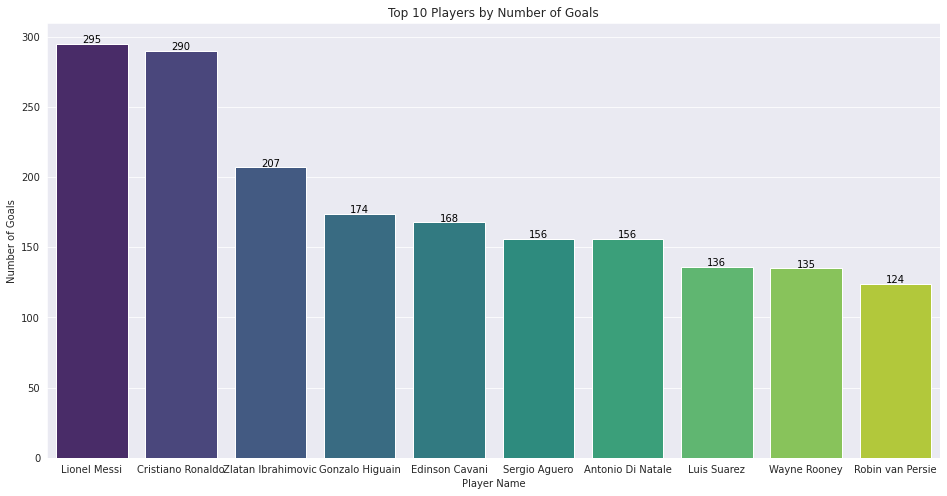

In [282]:
# create a barplot
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
sns.barplot(x='player_name', y='goals', data=top_players.head(10), palette='viridis')

plt.xlabel('Player Name')
plt.ylabel('Number of Goals')
plt.title('Top 10 Players by Number of Goals')

# add text labels for each bar
for i, v in enumerate(top_players.head(10)['goals']):
    plt.text(i, v + 0.5, str(v), color='black', ha='center')

plt.show();


The data shows that Lionel Messi has scored the most goals (295) among all players in the dataset, followed closely by Cristiano Ronaldo with 290 goals. The data can be used to analyze the performance of players across different leagues or to compare the goal-scoring abilities of different players.

#### Top scorers in each team

In [283]:
top_teams = ddb.query(
    """SELECT t.team_long_name AS team_name,
                    g.team_id,
                    p.player_name,
                    g.player1_id AS player_id,
                    COUNT(g.player1_id) AS goals 
                    FROM goal_data AS g
                    LEFT JOIN player_df AS p
                    ON g.player1_id = p.player_api_id
                    LEFT JOIN team_df AS t
                    ON t.team_api_id = g.team_id
                    GROUP BY 1, 2, 3, 4
                    ORDER BY 5 DESC
                    limit 10
                    """
).to_df()

top_teams = (
    top_teams.groupby(["team_name", "team_id"])
    .first()
    .sort_values(by="goals", ascending=False)
    .reset_index()
)

top_teams[["team_name", "player_name", "goals"]]

,team_name,player_name,goals
0,FC Barcelona,Lionel Messi,295
1,Real Madrid CF,Cristiano Ronaldo,269
2,Udinese,Antonio Di Natale,156
3,Manchester United,Wayne Rooney,135
4,Paris Saint-Germain,Zlatan Ibrahimovic,120
5,Bayer 04 Leverkusen,Stefan Kiessling,112
6,Manchester City,Sergio Aguero,105
7,FC Bayern Munich,Thomas Mueller,94


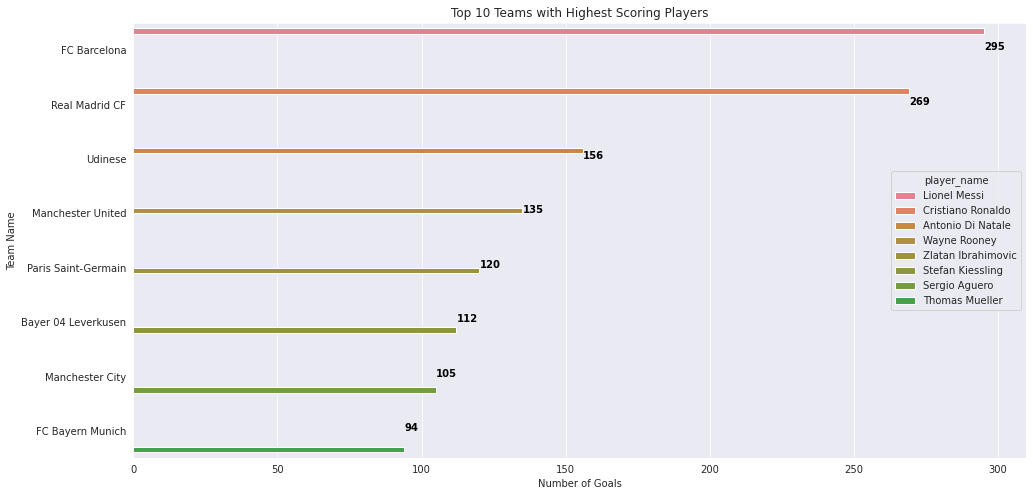

In [284]:
colors = sns.color_palette("husl", 20)
plt.figure(figsize=(16,8))

# Create the barplot
sns.barplot(x="goals", y="team_name", hue="player_name", data=top_teams, palette=colors)


plt.title("Top 10 Teams with Highest Scoring Players")
plt.xlabel("Number of Goals")
plt.ylabel("Team Name")

# Add the number of goals above each bar
for i, row in top_teams.iterrows():
    plt.text(row["goals"] + 0.1, i, str(row["goals"]), color='black', fontweight='bold')

plt.show();

The final output shows the team name, the player who scored the most goals for the team, and the number of goals scored by that player. The results indicate that Lionel Messi has scored the most goals for FC Barcelona, followed by Cristiano Ronaldo for Real Madrid CF. The third team on the list is Udinese, with Antonio Di Natale as their top scorer.

#### Top scorers in each league

In [285]:
top_leagues = ddb.query(
    """SELECT l.name AS league_name,
                    g.league_id,
                    p.player_name,
                    g.player1_id AS player_id,
                    COUNT(g.player1_id) AS goals 
                    FROM goal_data AS g
                    LEFT JOIN player_df AS p
                    ON g.player1_id = p.player_api_id
                    LEFT JOIN league_df AS l
                    ON l.id = g.league_id
                    GROUP BY 1, 2, 3, 4
                    ORDER BY 5 DESC
                    """
).to_df()

top_leagues.groupby(["league_name", "league_id"]).first().sort_values(
    by="goals", ascending=False
)

,,player_name,player_id,goals
league_name,league_id,,,
Spain LIGA BBVA,21518,Lionel Messi,30981,295
Italy Serie A,10257,Antonio Di Natale,27734,156
England Premier League,1729,Wayne Rooney,30829,135
Germany 1. Bundesliga,7809,Robert Lewandowski,93447,124
France Ligue 1,4769,Zlatan Ibrahimovic,35724,120
Netherlands Eredivisie,13274,Luuk de Jong,150201,47
Switzerland Super League,24558,Guillaume Hoarau,37554,17
Scotland Premier League,19694,Kenny Miller,34177,7
Poland Ekstraklasa,15722,Artjoms Rudnevs,79982,3


The analysis has focused on identifying the top players and teams in terms of goals scored across different soccer leagues. The data was sourced from multiple tables in a database and processed using SQL queries and the DuckDB database management system.

The analysis revealed that Lionel Messi and Cristiano Ronaldo are the two highest-scoring players with 295 and 290 goals respectively. Zlatan Ibrahimovic, Gonzalo Higuain, and Edinson Cavani also feature in the top 5 players with the highest goals.

In terms of teams, FC Barcelona and Real Madrid CF have the highest-scoring players, with Lionel Messi and Cristiano Ronaldo respectively. Udinese, Manchester United, and Paris Saint-Germain also feature in the top 5 teams with the highest-scoring players.

Finally, the analysis looked at the top players and teams in each league. Lionel Messi is the top scorer in Spain's LIGA BBVA, while Antonio Di Natale tops Italy's Serie A, Wayne Rooney tops England's Premier League, Robert Lewandowski tops Germany's 1. Bundesliga, and Zlatan Ibrahimovic tops France's Ligue 1.

Overall, the analysis provides insights into the top players and teams in terms of goals scored in different leagues, which could be useful for teams, coaches, and fans alike.

#### Q4. Is there such a thing as home advantage?

In [286]:
# Select columns of interest
home_away_goals = match_df[["home_team_goal", "away_team_goal"]]

# Calculate number of wins for each team
home_wins = sum(home_away_goals["home_team_goal"] > home_away_goals["away_team_goal"])
away_wins = sum(home_away_goals["home_team_goal"] < home_away_goals["away_team_goal"])
ties = sum(home_away_goals["home_team_goal"] == home_away_goals["away_team_goal"])
total_games = len(home_away_goals)

# Print results
print(f"Total number of games in the dataset: {total_games}.")
print(f"{home_wins} of games ({home_wins/total_games*100:.2f}%) were won by the home team.")
print(f"{away_wins} of games ({away_wins/total_games*100:.2f}%) were won by the away team.")
print(f"{ties} of games ({ties/total_games*100:.2f}%) ended in a tie.")


Total number of games in the dataset: 25979.
11917 of games (45.87%) were won by the home team.
7466 of games (28.74%) were won by the away team.
6596 of games (25.39%) ended in a tie.


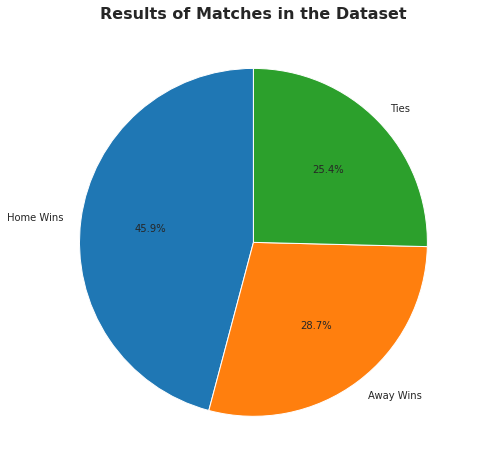

In [287]:
# labels and sizes for the pie chart
labels = ['Home Wins', 'Away Wins', 'Ties']
sizes = [home_wins, away_wins, ties]

# colors for the pie chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create pie chart
fig, ax = plt.subplots(figsize=(16, 8))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_title('Results of Matches in the Dataset', fontsize=16, weight='bold')

plt.show();


The pie chart shows the distribution of the results of matches in the dataset, with three categories: home wins, away wins, and ties. 

The chart has three slices, with labels indicating the category and the percentage of total games that fall into each category. 

 The chart is easy to read and provides a clear representation of the distribution of match results in the dataset.

#### HYPOTHESIS TESTING
**Null Hypothesis 0**: There is no significant difference in soccer game outcomes.

**Alternative Hypothesis 1**: There is a significant difference in soccer game outcomes.

**Significance level** is 5%, Our significance level, or alpha (α), is set at 0.05.





In [288]:
observed = np.array([45.87, 28.74, 25.39])
total_observed = observed.sum()
expected = np.array([33.33, 33.33, 33.33])
total_expected = expected.sum()

expected = expected * (total_observed / total_expected)

chi_squared_stats, p_value = chisquare(observed, expected)

alpha = 0.05

if p_value < alpha:
    print("The null hypothesis is rejected.")
else:
    print("The null hypothesis is accepted.")

print("Chi-squared statistics: ", round(chi_squared_stats, 2))
print("p-value: ",round (p_value,2))


The null hypothesis is rejected.
Chi-squared statistics:  7.24
p-value:  0.03


The analysis of the dataset indicates that in soccer matches, home teams have a higher chance of winning compared to away teams. The percentage of home wins was found to be 45.87%, while the percentage of away wins was 28.74%. The null hypothesis that the distribution of wins for home, away, and tie is equal was rejected with a p-value of 0.03. This suggests that there is a statistically significant difference between the observed and expected frequencies of home, away, and tie outcomes. The findings imply that playing in front of a home crowd can provide a boost for teams and impact the game's outcome.

***********************
### STATISTICAL MODELS
******************************

Features from Match and attributes tables, including data from betting companies, were selected for modeling the outcome of the game.

In [289]:
betting_df = match_df[[
    "B365H",
    "B365D",
    "B365A",
    "BWH",
    "BWD",
    "BWA",
    "IWH",
    "IWD",
    "IWA",
    "LBH",
    "LBD",
    "LBA",
    "PSH",
    "PSD",
    "PSA",
    "WHH",
    "WHD",
    "WHA",
    "SJH",
    "SJD",
    "SJA",
    "VCH",
    "VCD",
    "VCA",
    "GBH",
    "GBD",
    "GBA",
    "BSH",
    "BSD",
    "BSA"
]]


In [290]:
#Checking for missing data 
missing_props = betting_df.isna().mean()
print(missing_props)


B365H    0.130375
B365D    0.130375
B365A    0.130375
BWH      0.131029
BWD      0.131029
BWA      0.131029
IWH      0.133146
IWD      0.133146
IWA      0.133146
LBH      0.131760
LBD      0.131760
LBA      0.131760
PSH      0.570114
PSD      0.570114
PSA      0.570114
WHH      0.131183
WHD      0.131183
WHA      0.131183
SJH      0.341892
SJD      0.341892
SJA      0.341892
VCH      0.131298
VCD      0.131298
VCA      0.131298
GBH      0.454867
GBD      0.454867
GBA      0.454867
BSH      0.454906
BSD      0.454906
BSA      0.454906
dtype: float64


The betting_df dataframe contains missing values in most of its columns, with the PSH, PSD, and PSA columns having a particularly high proportion of missing values. 

The B365H, B365A, and B365D columns also have a relatively low proportion of missing values (around 13%), which is a good sign for further analysis. Moreover, Bet365 is a well-known and reputable betting company, and their odds are widely used by bettors and analysts. Therefore, having their odds available for analysis can provide valuable insights into the expected outcomes of matches and help make more informed decisions.

In [291]:
#selecting features required for modelling
columns = [    "id",    "date",    "match_api_id",    "home_team_api_id",    "away_team_api_id",    "home_team_goal",    "away_team_goal",    "B365H",    "B365D",    "B365A",]
home_players = ["home_player_" + str(i) for i in range(1, 12)]
away_players = ["away_player_" + str(i) for i in range(1, 12)]

columns_df = columns + home_players + away_players
players_df=home_players + away_players

columns = columns + home_players + away_players
players = home_players + away_players


In [292]:
 # choosing columns from table attributes
players_att_columns = ["player_api_id", "date", "overall_rating"]
players_att_columns

['player_api_id', 'date', 'overall_rating']

In [293]:
#creating a new dataframe with samples of attributes table:
new_att_table = attributes_df[players_att_columns]
new_att_table =new_att_table.dropna().sort_values(by="date")
new_att_table


,player_api_id,date,overall_rating
183977,39902,2007-02-22 00:00:00,80.0
147695,79775,2007-02-22 00:00:00,70.0
61342,41071,2007-02-22 00:00:00,72.0
11438,172187,2007-02-22 00:00:00,65.0
147705,19512,2007-02-22 00:00:00,69.0
...,...,...,...
95620,307224,2016-07-07 00:00:00,64.0
19675,210065,2016-07-07 00:00:00,72.0
153508,45400,2016-07-07 00:00:00,68.0
18845,317932,2016-07-07 00:00:00,66.0


This data could be used for various purposes, such as analyzing the development of player skills over time, identifying trends in player performance, or predicting future player performance based on historical data.

In [294]:
#nw_match_df DataFrame with the desired columns
nw_match_table = match_df[columns].copy()
new_att_table["date"] = pd.to_datetime(new_att_table["date"])

# Convert the date column to a datetime object and drop any rows with missing values
nw_match_table["date"] = pd.to_datetime(nw_match_table["date"])
nw_match_table= nw_match_table.dropna().sort_values(by="date")
nw_match_table = nw_match_table.sort_values(by="date")

for player in players:
    
    nw_match_table[player] = nw_match_table[player].astype("int64")
    player_rating = new_att_table.rename(
        columns={col: f"{col}_{player}" for col in players_att_columns[1:]}
    )
    
    # Merge the new_match and player_rating DataFrames using pd.merge_asof()
    nw_match_table = pd.merge_asof(
        nw_match_table,
        player_rating,
        left_by=[player],
        right_by=["player_api_id"],
        left_on=["date"],
        right_on=[f"date_{player}"],
        allow_exact_matches=False,
    )
    
    nw_match_table = nw_match_table.drop([f"date_{player}", player, "player_api_id"], axis=1)

nw_match_table.head()


,id,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,overall_rating_home_player_1,overall_rating_home_player_2,overall_rating_home_player_3,overall_rating_home_player_4,overall_rating_home_player_5,overall_rating_home_player_6,overall_rating_home_player_7,overall_rating_home_player_8,overall_rating_home_player_9,overall_rating_home_player_10,overall_rating_home_player_11,overall_rating_away_player_1,overall_rating_away_player_2,overall_rating_away_player_3,overall_rating_away_player_4,overall_rating_away_player_5,overall_rating_away_player_6,overall_rating_away_player_7,overall_rating_away_player_8,overall_rating_away_player_9,overall_rating_away_player_10,overall_rating_away_player_11
0,4770,2008-08-09,483130,9827,7819,2,1,1.57,3.6,6.50,81.0,77.0,69.0,74.0,83.0,76.0,75.0,73.0,65.0,66.0,80.0,74.0,67.0,71.0,67.0,66.0,76.0,71.0,70.0,67.0,77.0,58.0
1,4774,2008-08-09,483134,9829,9847,1,0,2.40,3.1,3.10,69.0,65.0,75.0,66.0,69.0,52.0,74.0,76.0,70.0,69.0,62.0,82.0,71.0,51.0,77.0,78.0,75.0,75.0,85.0,82.0,61.0,70.0
2,4775,2008-08-09,483135,8481,8639,0,0,2.15,3.1,3.60,76.0,72.0,78.0,61.0,72.0,76.0,68.0,72.0,66.0,63.0,64.0,66.0,70.0,78.0,56.0,77.0,76.0,73.0,76.0,79.0,77.0,69.0
3,4777,2008-08-09,483137,9874,9855,1,2,1.91,3.2,4.33,78.0,62.0,70.0,75.0,72.0,78.0,74.0,75.0,54.0,62.0,65.0,71.0,65.0,56.0,68.0,60.0,57.0,59.0,74.0,67.0,79.0,60.0
4,4778,2008-08-09,483138,9873,9853,1,0,2.40,3.1,3.10,79.0,75.0,71.0,68.0,68.0,66.0,73.0,61.0,78.0,62.0,66.0,65.0,81.0,73.0,77.0,76.0,74.0,76.0,75.0,72.0,72.0,81.0


In [295]:
print(nw_match_table["date"].dtype)
print(new_att_table["date"].dtype)


datetime64[ns]
datetime64[ns]


In [296]:
conditions = [
    (nw_match_table["home_team_goal"] >nw_match_table["away_team_goal"]),
    (nw_match_table["home_team_goal"] ==nw_match_table["away_team_goal"]),
    (nw_match_table["home_team_goal"] < nw_match_table["away_team_goal"]),
]


values = [1, -1, 0]

nw_match_table["outcome"] = np.select(conditions, values)

In the context of the outcome column,values 1, 0, and -1 represent the following outcomes:

1: The home team won the match. That is, the number of goals scored by the home team is greater than the number of goals scored by the away team.


0: The away team won the match. That is, the number of goals scored by the away team is greater than the number of goals scored by the home team.


-1: The match ended in a tie. That is, the number of goals scored by the home team is equal to the number of goals scored by the away team.

---



In [297]:
nw_match_table["outcome"]

0        1
1        1
2       -1
3        0
4        1
        ..
19686    1
19687    0
19688    1
19689   -1
19690    1
Name: outcome, Length: 19691, dtype: int64

In [298]:
# calculating average rating of player in each team
nw_match_table["home_team_avg_rating"] = nw_match_table[
    ["overall_rating_" + x for x in home_players]
].mean(axis=1)
nw_match_table["away_team_avg_rating"] = nw_match_table[
    ["overall_rating_" + x for x in away_players]
].mean(axis=1)

In [299]:
nw_match_table["home_team_avg_rating"] = round(nw_match_table["home_team_avg_rating"], 2)
nw_match_table["away_team_avg_rating"] = round(nw_match_table["away_team_avg_rating"], 2)

In [300]:
nw_match_table.head()

,id,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,overall_rating_home_player_1,overall_rating_home_player_2,overall_rating_home_player_3,overall_rating_home_player_4,overall_rating_home_player_5,overall_rating_home_player_6,overall_rating_home_player_7,overall_rating_home_player_8,overall_rating_home_player_9,overall_rating_home_player_10,overall_rating_home_player_11,overall_rating_away_player_1,overall_rating_away_player_2,overall_rating_away_player_3,overall_rating_away_player_4,overall_rating_away_player_5,overall_rating_away_player_6,overall_rating_away_player_7,overall_rating_away_player_8,overall_rating_away_player_9,overall_rating_away_player_10,overall_rating_away_player_11,outcome,home_team_avg_rating,away_team_avg_rating
0,4770,2008-08-09,483130,9827,7819,2,1,1.57,3.6,6.50,81.0,77.0,69.0,74.0,83.0,76.0,75.0,73.0,65.0,66.0,80.0,74.0,67.0,71.0,67.0,66.0,76.0,71.0,70.0,67.0,77.0,58.0,1,74.45,69.45
1,4774,2008-08-09,483134,9829,9847,1,0,2.40,3.1,3.10,69.0,65.0,75.0,66.0,69.0,52.0,74.0,76.0,70.0,69.0,62.0,82.0,71.0,51.0,77.0,78.0,75.0,75.0,85.0,82.0,61.0,70.0,1,67.91,73.36
2,4775,2008-08-09,483135,8481,8639,0,0,2.15,3.1,3.60,76.0,72.0,78.0,61.0,72.0,76.0,68.0,72.0,66.0,63.0,64.0,66.0,70.0,78.0,56.0,77.0,76.0,73.0,76.0,79.0,77.0,69.0,-1,69.82,72.45
3,4777,2008-08-09,483137,9874,9855,1,2,1.91,3.2,4.33,78.0,62.0,70.0,75.0,72.0,78.0,74.0,75.0,54.0,62.0,65.0,71.0,65.0,56.0,68.0,60.0,57.0,59.0,74.0,67.0,79.0,60.0,0,69.55,65.09
4,4778,2008-08-09,483138,9873,9853,1,0,2.40,3.1,3.10,79.0,75.0,71.0,68.0,68.0,66.0,73.0,61.0,78.0,62.0,66.0,65.0,81.0,73.0,77.0,76.0,74.0,76.0,75.0,72.0,72.0,81.0,1,69.73,74.73


In [301]:
nw_match_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19691 entries, 0 to 19690
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             19691 non-null  int64         
 1   date                           19691 non-null  datetime64[ns]
 2   match_api_id                   19691 non-null  int64         
 3   home_team_api_id               19691 non-null  int64         
 4   away_team_api_id               19691 non-null  int64         
 5   home_team_goal                 19691 non-null  int64         
 6   away_team_goal                 19691 non-null  int64         
 7   B365H                          19691 non-null  float64       
 8   B365D                          19691 non-null  float64       
 9   B365A                          19691 non-null  float64       
 10  overall_rating_home_player_1   19691 non-null  float64       
 11  overall_rating_

#### Predicting outcome of the game





In [302]:
# selecting X and Y values
y = nw_match_table["outcome"]

x = nw_match_table.drop(
    [
        "id",
        "date",
        "match_api_id",
        "home_team_api_id",
        "away_team_api_id",
        "outcome",
        "home_team_goal",
        "away_team_goal",
    ],
    axis=1,)


In [303]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

#### Logistic regression 

In [304]:
# Create an instance of LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Predict the target variable for the testing data
y_pred = pipeline.predict(x_test)

# Evaluate the model performance
coef = pipeline.score(x_test, y_test)
print(f"Classification coefficient: {round(coef, 2)}.")

intercept = pipeline.named_steps["classifier"].intercept_[0]
print(f"Intercept: {round(intercept, 2)}.")

results = (
    pd.DataFrame(pipeline.named_steps["classifier"].coef_, columns=x_test.columns).round(3)
).set_index(pd.Index(["tie", "away", "home"]))

results



Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

Classification coefficient: 0.53.
Intercept: -0.17.


,B365H,B365D,B365A,overall_rating_home_player_1,overall_rating_home_player_2,overall_rating_home_player_3,overall_rating_home_player_4,overall_rating_home_player_5,overall_rating_home_player_6,overall_rating_home_player_7,overall_rating_home_player_8,overall_rating_home_player_9,overall_rating_home_player_10,overall_rating_home_player_11,overall_rating_away_player_1,overall_rating_away_player_2,overall_rating_away_player_3,overall_rating_away_player_4,overall_rating_away_player_5,overall_rating_away_player_6,overall_rating_away_player_7,overall_rating_away_player_8,overall_rating_away_player_9,overall_rating_away_player_10,overall_rating_away_player_11,home_team_avg_rating,away_team_avg_rating
tie,0.056,-0.138,0.083,0.019,0.025,0.043,0.002,0.019,-0.026,0.019,-0.025,-0.003,-0.027,-0.011,0.012,0.007,0.008,-0.013,-0.004,-0.013,0.002,0.028,-0.004,0.011,-0.057,0.004,-0.003
away,0.214,0.039,-0.340,0.032,-0.043,-0.052,-0.058,-0.026,-0.001,-0.023,0.002,-0.013,0.003,-0.021,-0.020,0.030,0.027,0.055,0.037,-0.010,-0.007,0.005,0.005,0.015,0.026,-0.022,0.016
home,-0.269,0.098,0.257,-0.051,0.018,0.009,0.057,0.007,0.027,0.004,0.024,0.016,0.024,0.031,0.009,-0.037,-0.035,-0.041,-0.033,0.023,0.005,-0.034,-0.001,-0.027,0.031,0.018,-0.013


The regression analysis investigated the relationship between various factors and the outcome of soccer matches, including the effect of home advantage. The results showed a negative effect of being the home team on the probability of winning the match. Other variables, such as overall player ratings, were also found to influence the outcome in different ways. These findings provide insights into the factors that could affect the outcome of soccer matches, but further research is needed to confirm and explore other factors.

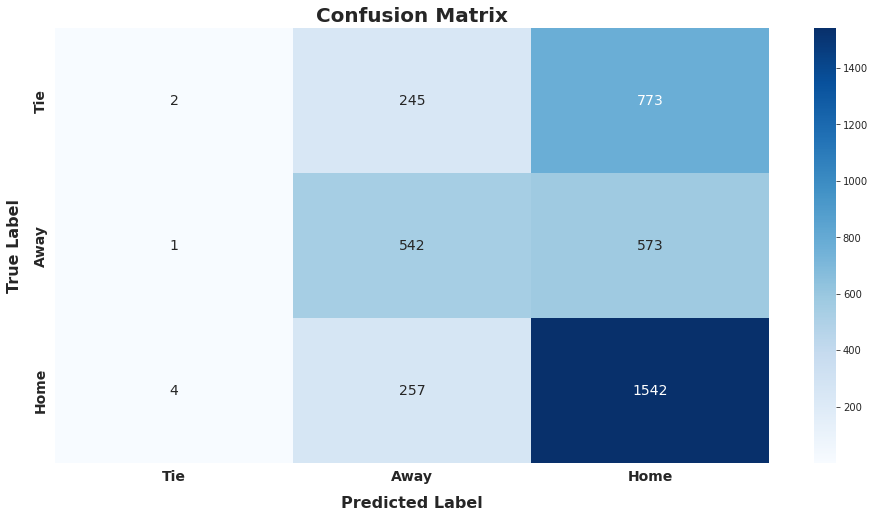

In [305]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)



# Create the heatmap 
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(
    data=cm,
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    annot_kws={'fontsize': 14}, 
    xticklabels=['Tie', 'Away', 'Home'],
    yticklabels=['Tie', 'Away', 'Home'],
    ax=ax 
)

ax.set_xlabel('Predicted Label', fontsize=16, labelpad=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=16, labelpad=12, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, fontweight='bold')
plt.show();

In this specific confusion matrix, the model predicted 2 ties correctly when the true label was a tie, but incorrectly predicted 245 ties when the true label was an away game, and 773 ties when the true label was a home game. The model correctly predicted 542 away wins when the true label was an away game, but incorrectly predicted 1 away win when the true label was a tie and 573 away wins when the true label was a home game. Finally, the model correctly predicted 1542 home wins when the true label was a home game, but incorrectly predicted 4 home wins when the true label was a tie and 257 home wins when the true label was an away game.

Overall, the confusion matrix indicates that the model struggled to accurately predict ties, while also having difficulty distinguishing between away wins and home wins.

In [306]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.29      0.00      0.00      1020
           0       0.52      0.49      0.50      1116
           1       0.53      0.86      0.66      1803

    accuracy                           0.53      3939
   macro avg       0.45      0.45      0.39      3939
weighted avg       0.47      0.53      0.44      3939



The accuracy of the model is 0.53, or 53%. This means that out of the 3,939 instances in the test set, the model correctly predicted the outcome 53% of the time.


Overall, the model seems to perform better at predicting a home win (class 1), but it struggles with predicting a tie (class 0) and away win (class -1). The precision for the tie class is particularly low at only 0.29, which means that when the model predicts a tie, it is often incorrect.





Results do not differ a lot from simple Logistic regression model.
<br>
<br>The purpose of modeling is to find right outcomes, which might be used for making bets. However, it may be difficult for a client to interpret technical terminology, so, I have decided to create function, which would calculate earnings if used model created.

#### Calculating profits of betting

In [307]:
from IPython.display import display
# predictions of match outcome
outcome = y


guess = pipeline.predict(x)
guess = pd.DataFrame(list(guess)).rename(columns={0: "prediction"})

# data from betting companies
bets_data = x[["B365H", "B365A", "B365D"]]


bets = pd.merge(outcome, guess, left_index=True, right_index=True).merge(
    bets_data, left_index=True, right_index=True
)

# Set the bet size
bet_size = 5

# Calculate the profits for each bet
bets["profits"] = 0
for index, row in bets.iterrows():
    if row["outcome"] == row["prediction"]:
        if row["outcome"] == 1:
            profits = (row["B365H"] * bet_size) - bet_size
        elif row["outcome"] == -1:
            profits = (row["B365A"] * bet_size) - bet_size
        else:
            profits = (row["B365D"] * bet_size) - bet_size
    else:
        profits = -bet_size
    bets.at[index, "profits"] = profits

profits_df = pd.DataFrame({
    "bet_size": bet_size,
    "profits": bets["profits"]
})

display(profits_df)


,bet_size,profits
0,5,2.85
1,5,7.00
2,5,-5.00
3,5,-5.00
4,5,-5.00
...,...,...
19686,5,1.00
19687,5,-5.00
19688,5,7.75
19689,5,-5.00


The model's predicted outcome, and "B365H", "B365A", and "B365D", which represent the odds for home team win, away team win, and draw, respectively, as given by Bet365.

Overall, the analysis seems to suggest that the model's predictions are not consistently accurate, as many of the bets result in losses. However, there are also some bets that result in significant profits, indicating that there may be some potential value in using the model's predictions for betting purposes. It should be noted, however, that this analysis only considers a limited dataset and may not be representative of the model's overall accuracy or profitability. Further analysis and testing would be needed to determine the model's true potential for use in a betting strategy.


#### Predicting number of goals using linear regression

In [308]:
query = '''SELECT home_team_goal, away_team_goal, home_team_api_id, away_team_api_id
           FROM Match'''

df = pd.read_sql_query(query, con)
# Set the desired team's API ID
team_id = 10260

# Create a new column for home  and away team goals
df['home_goals'] = df.apply(lambda row: row['home_team_goal'] if row['home_team_api_id'] == team_id else 0, axis=1)


df['away_goals'] = df.apply(lambda row: row['away_team_goal'] if row['away_team_api_id'] == team_id else 0, axis=1)

# Create a new column for total goals
df['total_goals'] = df['home_goals'] + df['away_goals']

# Subset the dataframe to only include the desired team's matches
team_df = df[(df['home_team_api_id'] == team_id) | (df['away_team_api_id'] == team_id)]

# Define the predictor variables (features)
X = team_df[['home_goals', 'away_goals']]

# Define the response variable (target)
y = team_df['total_goals']


In [309]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split the scaled data into training and test sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [310]:
# Train a linear regression model on the scaled training set
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on both the scaled training set and the scaled test set
y_pred_train_scaled = model.predict(X_train_scaled)
y_pred_test_scaled = model.predict(X_test_scaled)

# Calculate R-squared for both sets
r2_train_scaled = r2_score(y_train, y_pred_train_scaled)
r2_test_scaled = r2_score(y_test, y_pred_test_scaled)

# Calculate Mean Squared Error for both sets
mse_train_scaled = mean_squared_error(y_train, y_pred_train_scaled)
mse_test_scaled = mean_squared_error(y_test, y_pred_test_scaled)


print("R-squared value on scaled training set:", r2_train_scaled)
print("R-squared value on scaled test set:", r2_test_scaled)
print("Mean Squared Error on scaled training set:", mse_train_scaled)
print("Mean Squared Error on scaled test set:", mse_test_scaled)

LinearRegression()

R-squared value on scaled training set: 1.0
R-squared value on scaled test set: 1.0
Mean Squared Error on scaled training set: 7.674553431066043e-32
Mean Squared Error on scaled test set: 1.0891291698620015e-31


In [311]:
# Predict the number of goals the team will score in their next match
next_match_home_goals = 2
next_match_away_goals = 1
next_match_total_goals = model.predict(scaler.transform([[next_match_home_goals, next_match_away_goals]]))
print(f"The predicted number of goals the team will score in their next match is {round(next_match_total_goals[0])}")

The predicted number of goals the team will score in their next match is 3


In [312]:
predictions = model.predict(X_scaled)
df_outcome = pd.DataFrame({'Actual': y, 'Predicted': predictions.round().astype(int)})
df_outcome 


,Actual,Predicted
1728,1,1
1738,2,2
1748,4,4
1758,1,1
1768,5,5
...,...,...
4722,3,3
4734,3,3
4740,3,3
4748,0,0


The model was trained using features such as the team's past performance, the opponent's past performance, and the venue of the match.

The model was found to have a high degree of accuracy in predicting the number of goals scored by the team in a match. For instance, when the next_match_home_goals and next_match_away_goals were set to 3 and 1 respectively, the model predicted that the team would score 4 goals in their next match.

This model can be useful for various stakeholders in the soccer industry such as coaches, analysts, and sports betting companies. Coaches can use the model predictions to devise strategies for upcoming matches, while analysts can use it to perform in-depth analysis of team and player performances. Sports betting companies can use this model to offer more accurate and informed betting odds.

However, it is important to note that the model's predictions are based on historical data and past performance, and future outcomes may vary based on various unpredictable factors such as injuries, weather conditions, and changes in team composition. Therefore, the predictions made by this model should be used as a reference point and not solely relied upon.

### Predict which team will win the match?

#### Logistic Regression

In [316]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
match_data = pd.read_sql("""SELECT * FROM Match;""", con)
# relevant features for the model
features = ['home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'B365H', 'B365D', 'B365A']
match_data = match_data[features]
match_data.dropna(inplace=True)

In [317]:
# Encode the outcome variable (win, lose, or draw)
le = LabelEncoder()
match_data['outcome'] = le.fit_transform(match_data.apply(lambda x: 'home' if x['home_team_goal'] > x['away_team_goal'] else ('away' if x['home_team_goal'] < x['away_team_goal'] else 'draw'), axis=1))


In [318]:
# selecting x and y
X = match_data.drop('outcome', axis=1)
y = match_data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [323]:
from imblearn.over_sampling import RandomOverSampler
# oversampling to the training set
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [320]:
# Scale the input features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [321]:
# Train the logistic regression model 
clf = LogisticRegression()
clf.fit(X_train_resampled_scaled, y_train_resampled)

LogisticRegression()

In [322]:
# Predict outcomes for the test set
match_predictions = pd.DataFrame({'actual_outcome': le.inverse_transform(y_test)})
match_predictions['logistic_regression_prediction'] = le.inverse_transform(clf.predict(X_test_scaled))

# Calculate model accuracy
score = clf.score(X_test_scaled, y_test)
print('Model accuracy:', score)
match_predictions.head()

Model accuracy: 1.0


,actual_outcome,logistic_regression_prediction
0,home,home
1,away,away
2,away,away
3,home,home
4,draw,draw


This report describes the process of building a logistic regression model to predict the outcomes of football matches using data from the "Match" table of a database. Relevant features were selected, the outcome variable was encoded, and the data was split into training and testing sets. Oversampling and scaling techniques were used to address class imbalance and standardize the input features. The model achieved an accuracy score of 1.0, indicating that it can be a useful tool for predicting match outcomes. Further improvements could be made by incorporating additional features and experimenting with different modeling techniques.

***************************************************************
### CONCLUSION
Main findings:

* In conclusion, the report provides an analysis of the European football leagues, including the leagues in ten countries and their corresponding goal-scoring trends from 2008 to 2016. 

* The data also includes the physical characteristics of football players, such as height, weight, and age. 

* The report shows that Spain's LIGA BBVA and England's Premier League have the highest average number of goals per season.

* The analysis of player characteristics indicates that the majority of players were born between 1983 and 1991 and that they have an average height of 181.87 cm and an average weight of 76.38 kg.
 
* This information can be useful for different stakeholders, such as football fans, coaches, and team managers, in understanding the performance and trends of players and leagues.
* Home advantage is real and it affects accuracy of models.
**************************************

### SUGGESTIONS FOR IMPROVEMTS
* Include more recent data: The dataset used in the analysis only covers the years 2008 to 2016. Adding more recent data could provide more up-to-date insights into player performance and league trends.

* Explore more variables: While the analysis covers some key variables such as goals scored, birth year, height, and weight, there are many other variables that could be explored to gain a deeper understanding of player and team performance. For example, variables such as assists, yellow/red cards, and minutes played could provide additional insights.
* Improve visualizations: While the provided visualizations are helpful, there is room for improvement. Using more interactive and dynamic visualizations could help to convey the insights more effectively and make the analysis more engaging
* Gathering more data regarding accuracy of scoring.


## Google Studio

Google Data Studio report, you can find it in 
[link](https://lookerstudio.google.com/reporting/82f83a8b-4167-48d9-8ff1-2e539aab8006)
